#  Melanie Schwartz (sno122)
DS 4033
Dr. Acosta
4/2/2024

In [215]:
# TODO: a)
# Libraries for hw3
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [216]:
# Load CSV
df = pd.read_csv('insurance2.csv')  

In [217]:
# Define and fit  model
model = smf.ols('expenses ~ age + C(sex) + bmi + children\n'
                ' + C(smoker) + C(region)', data=df).fit()

In [218]:
# R-squared and Adjusted R-squared values
print(f"R-squared: {model.rsquared:.4f}")
print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")

R-squared: 0.7509
Adjusted R-squared: 0.7494


In [219]:
# Coefficients
print("\nCoefficient Model:")
print(model.params)


Coefficient Model:
Intercept                -11941.562461
C(sex)[T.male]             -131.352014
C(smoker)[T.yes]          23847.476695
C(region)[T.northwest]     -352.790096
C(region)[T.southeast]    -1035.595701
C(region)[T.southwest]     -959.305829
age                         256.839171
bmi                         339.289863
children                    475.688916
dtype: float64


In [220]:
# TODO: b)
# Acg increase in expenses 
increase_per_child = model.params["children"]
increase_per_age = model.params["age"]
print(f"Child Increase: ${increase_per_child:.2f}")
print(f"Age expense increase: ${increase_per_age:.2f}")

Child Increase: $475.69
Age expense increase: $256.84


In [221]:
# TODO: c)
# Create a binary variable BMI_ind
df['BMI_ind'] = (df['bmi'] >= 30).astype(int)

In [222]:
# Create an interaction variable between BMI_ind and smoker
# Need to convert smoker to a binary variable 
df['smoker_yes'] = (df['smoker'] == 'yes').astype(int)
df['BMI_ind_smoker'] = df['BMI_ind'] * df['smoker_yes']
# 

print(df[['age', 'BMI_ind', 'smoker', 'BMI_ind_smoker']].head())


   age  BMI_ind smoker  BMI_ind_smoker
0   19        0    yes               0
1   18        1     no               0
2   28        1     no               0
3   33        0     no               0
4   32        0     no               0


In [223]:
# TODO: d)
# New predictors
model_new = smf.ols('expenses ~ age + C(sex) + bmi + children\n'
                    ' + C(smoker) + C(region) + BMI_ind\n'
                    ' + BMI_ind_smoker', data=df).fit()

In [224]:
# New Model
new_model = {
    "R-squared": model_new.rsquared,
    "Adjusted R-squared": model_new.rsquared_adj,
    "Coefficients": {
        "Intercept": model_new.params['Intercept'],
        "Sex (Male)": model_new.params['C(sex)[T.male]'],
        "Smoker (Yes)": model_new.params['C(smoker)[T.yes]'],
        "Region (Northwest)": model_new.params['C(region)[T.northwest]'],
        "Region (Southeast)": model_new.params['C(region)[T.southeast]'],
        "Region (Southwest)": model_new.params['C(region)[T.southwest]'],
        "Age": model_new.params['age'],
        "BMI": model_new.params['bmi'],
        "Children": model_new.params['children'],
        "BMI_ind": model_new.params['BMI_ind'],
        "BMI_ind_smoker": model_new.params['BMI_ind_smoker']
    }
}

In [225]:
print("Model Summary:")
print(f"R-squared: {new_model['R-squared']:.4f}")
print(f"Adjusted R-squared: {new_model['Adjusted R-squared']:.4f}")
for key, value in new_model['Coefficients'].items():
    print(f"{key}: {value:.4f}")

Model Summary:
R-squared: 0.8639
Adjusted R-squared: 0.8628
Intercept: -4740.6822
Sex (Male): -491.1295
Smoker (Yes): 13402.2873
Region (Northwest): -266.7997
Region (Southeast): -824.5730
Region (Southwest): -1223.8697
Age: 263.2428
BMI: 114.8282
Children: 520.4738
BMI_ind: -863.2546
BMI_ind_smoker: 19794.2644


In [226]:
# TODO: e)
# Additional expense of smokers
additional_if_smoker = model_new.params['C(smoker)[T.yes]']
print(f"Being a smoker increases on average ${additional_if_smoker:.2f}\n"
      f"annually vs. a non-smoker.")

Being a smoker increases on average $13402.29
annually vs. a non-smoker.


In [227]:
# TODO: f)
# Additional smokers
additional_if_smoker = model_new.params['C(smoker)[T.yes]']

# Additional expense for obese
additional_if_obese = model_new.params['BMI_ind']

# Additional expense for interaction between being obese/smoker
additional_obese_smoker_expense = model_new.params['BMI_ind_smoker']

# Obese smokers compared to non-smokers who are not obese
total_additional_expense = (additional_if_smoker
                            + additional_if_obese + 
                            additional_obese_smoker_expense)
print(f"Obese smokers avg spending: ${total_additional_expense:.2f}")

Obese smokers avg spending: $32333.30


In [228]:
# TODO: g) 
# Predicted expenses
yhat = model_new.predict(df)

# Add the predictions as new column to the DataFrame
df['Predicted_Expenses'] = yhat

# Calculate the correlation between actual vs predicted
correlation = df['expenses'].corr(df['Predicted_Expenses'])
print(f"The correlation between actual and predicted\n"
      f" expenses is: ${correlation:.2f}")

The correlation between actual and predicted
 expenses is: $0.93


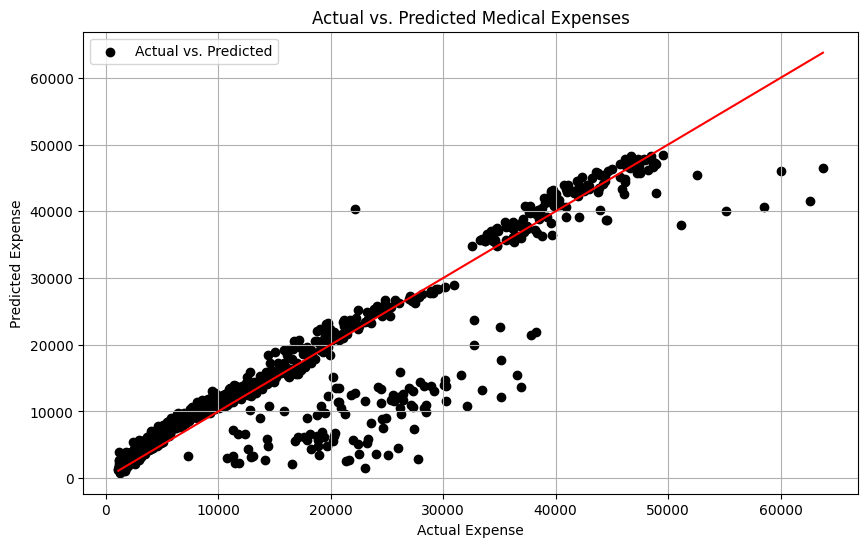

In [229]:
# TODO: h)
# Scatterplot of actual vs. predicted expenses
plt.figure(figsize=(10, 6))
plt.scatter(df['expenses'], df['Predicted_Expenses'],
            color='black', label='Actual vs. Predicted')
# 45-degree line
plt.plot([df['expenses'].min(), df['expenses'].max()],
         [df['expenses'].min(), df['expenses'].max()],
         color='red')
# Plot labesl
plt.xlabel('Actual Expense')
plt.ylabel('Predicted Expense')
plt.title('Actual vs. Predicted Medical Expenses')
plt.legend()
plt.grid(True)
plt.show()

In [230]:
# TODO: i) 
# Adjusted DataFrame for prediction including BMI_ind and BMI_ind_smoker
predicted = pd.DataFrame({
    'age': [30],
    'sex': ['male'],
    'bmi': [30],  
    'children': [2],
    'smoker': ['yes'],
    'region': ['northeast'],
    'BMI_ind': [1], 
    'smoker_yes': [1]  
})

In [231]:
# 'smoker_yes' or 'C(smoker)' 
predicted['BMI_ind_smoker'] = (predicted['BMI_ind']
                               * predicted['smoker_yes'])
# Predicted expense
predicted_expenses = model_new.predict(predicted)

In [232]:
print(f"Predicted yearly expenses: ${predicted_expenses.iloc[0]:.2f}")

Predicted yearly expenses: $39484.57
